
# Sentiment Analysis: TextBlob Vs VADER Vs Flair

This notebook will go over the Python implementation of TextBlob, VADER, and Flair for non-model sentiment analysis.

### Step 1: Install And Import Python Libraries

For the sentiment analysis, we need to import TextBlob, SentimentIntensityAnalyzer from vaderSentiment, and TextClassifier from flair. We also need to load the English sentiment data from TextClassifier and import Sentence for text processing for the flair pre-trained model.

To check the sentiment prediction accuracy, we need to import accuracy_score from sklearn.

Last but not least, we set the pandas dataframe column width to be 1000, which will allow us to see more content from the review.

In [167]:
from datetime import date
#import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")

In [168]:
# Data processing
import pandas as pd
import numpy as np
# Import TextBlob
from textblob import TextBlob
# Import VADER sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Import flair pre-trained sentiment model
from flair.models import TextClassifier
classifier = TextClassifier.load('en-sentiment')
# Import flair Sentence to process input text
from flair.data import Sentence
# Import accuracy_score to check performance
from sklearn.metrics import accuracy_score
# Set a wider colwith
pd.set_option('display.max_colwidth', 1000)

In [148]:
import nltk
import pandas as pd
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alhai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# VADER

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [32]:
df = pd.read_csv('tweets_cleaned.csv')
df

,tweet
0,rt mattgertz elon musk interacting with sycoph...
1,rt mattgertz elon musk interacting with sycoph...
2,rt elizableu i d like to make something else c...
3,rt disclosetv just in elon musk has reinstated...
4,rt behizytweets breaking elon musk just reinst...
...,...
328390,now see i was led to believe that he is pro we...
328391,rt mattophobia elon musk is genuinely such an ...
328392,rt capitolhunters someone has to say it elon m...
328393,rt stephenking speaking of bad jokes elon musk...


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328395 entries, 0 to 328394
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweet   328191 non-null  object
dtypes: object(1)
memory usage: 2.5+ MB


In [35]:
df.dropna(inplace=True)

In [36]:
df.iloc[0]['tweet']

'rt mattgertz elon musk interacting with sycophantic right wing influencers this weekend a thread'

In [37]:
sid.polarity_scores(df.iloc[0]['tweet'])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [38]:
df['tweet'].apply(lambda tweet: sid.polarity_scores(tweet))

0         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2         {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...
3         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                                ...                        
328390    {'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp...
328391    {'neg': 0.492, 'neu': 0.508, 'pos': 0.0, 'comp...
328392    {'neg': 0.098, 'neu': 0.902, 'pos': 0.0, 'comp...
328393    {'neg': 0.189, 'neu': 0.703, 'pos': 0.108, 'co...
328394    {'neg': 0.468, 'neu': 0.44, 'pos': 0.092, 'com...
Name: tweet, Length: 328191, dtype: object

In [100]:
df['scores_V'] = df['tweet'].apply(lambda tweet: sid.polarity_scores(tweet))

In [44]:
df.head()

,tweet,scores_V
0,rt mattgertz elon musk interacting with sycoph...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,rt mattgertz elon musk interacting with sycoph...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,rt elizableu i d like to make something else c...,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp..."
3,rt disclosetv just in elon musk has reinstated...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,rt behizytweets breaking elon musk just reinst...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [101]:
df['compound'] = df['scores_V'].apply(lambda d: d['compound'])

In [102]:
df.head()

,tweet,scores_V,compound,comp_vader,Subjectivity,Polarity,Analysis_TB,scores_flair,pred_flair
0,rt mattgertz elon musk interacting with sycophantic right wing influencers this weekend a thread,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,NEUTRAL,0.535714,0.285714,POSITIVE,0.997678,POSITIVE
1,rt mattgertz elon musk interacting with sycophantic right wing influencers this weekend a thread,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,NEUTRAL,0.535714,0.285714,POSITIVE,0.997678,POSITIVE
2,rt elizableu i d like to make something else clear i don t work for twitter elon musk any government political party group etc i ru,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.7783}",0.7783,POSITIVE,0.241667,0.050000,POSITIVE,0.993169,NEGATIVE
3,rt disclosetv just in elon musk has reinstated rep marjorie taylor greene s r ga personal twitter account,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,NEUTRAL,0.300000,0.000000,NEUTRAL,0.956426,NEGATIVE
4,rt behizytweets breaking elon musk just reinstated marjorie taylor greene s account,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,NEUTRAL,0.000000,0.000000,NEUTRAL,0.997801,NEGATIVE


In [103]:
df['comp_vader'] = df['compound'].apply(lambda score: 'POSITIVE' if score >0 else ('NEUTRAL' if score ==0 else 'NEGATIVE'))

In [104]:
df.head()

,tweet,scores_V,compound,comp_vader,Subjectivity,Polarity,Analysis_TB,scores_flair,pred_flair
0,rt mattgertz elon musk interacting with sycophantic right wing influencers this weekend a thread,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,NEUTRAL,0.535714,0.285714,POSITIVE,0.997678,POSITIVE
1,rt mattgertz elon musk interacting with sycophantic right wing influencers this weekend a thread,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,NEUTRAL,0.535714,0.285714,POSITIVE,0.997678,POSITIVE
2,rt elizableu i d like to make something else clear i don t work for twitter elon musk any government political party group etc i ru,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.7783}",0.7783,POSITIVE,0.241667,0.050000,POSITIVE,0.993169,NEGATIVE
3,rt disclosetv just in elon musk has reinstated rep marjorie taylor greene s r ga personal twitter account,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,NEUTRAL,0.300000,0.000000,NEUTRAL,0.956426,NEGATIVE
4,rt behizytweets breaking elon musk just reinstated marjorie taylor greene s account,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,NEUTRAL,0.000000,0.000000,NEUTRAL,0.997801,NEGATIVE


In [92]:
df['comp_vader'].value_counts()

comp_vader
NEGATIVE    135505
POSITIVE    101453
NEUTRAL      91233
Name: count, dtype: int64

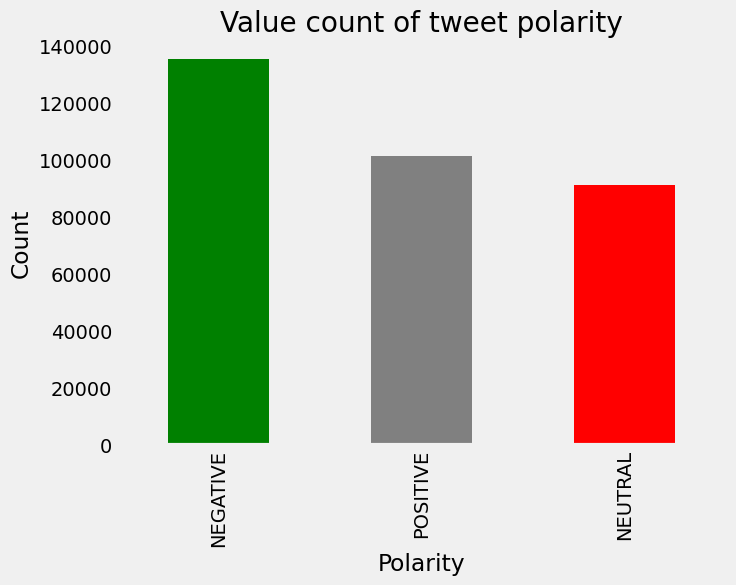

In [94]:
#plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(7,5))
color = ['green', 'grey', 'red']
df['comp_vader'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Distribution of polarity')

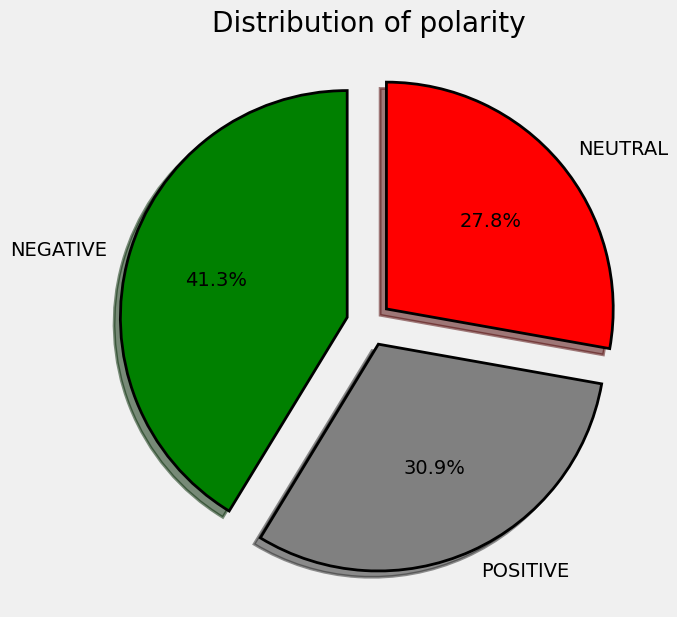

In [95]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('green',  'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df['comp_vader'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')

# TextBlob

In [97]:
#get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


df['Subjectivity'] = df['tweet'].apply(getSubjectivity)
df['Polarity'] = df['tweet'].apply(getPolarity)

In [98]:
from textblob import TextBlob

#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'NEGATIVE'
    elif score ==0:
        return 'NEUTRAL'
    else:
        return 'POSITIVE'
       

In [99]:
 df['Analysis_TB'] = df['Polarity'].apply(getAnalysis)

In [57]:
df.head()

,tweet,scores_V,compound,comp_vader,Subjectivity,Polarity,Analysis_TB
0,rt mattgertz elon musk interacting with sycoph...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,0.535714,0.285714,Positive
1,rt mattgertz elon musk interacting with sycoph...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,0.535714,0.285714,Positive
2,rt elizableu i d like to make something else c...,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",0.7783,Positive,0.241667,0.050000,Positive
3,rt disclosetv just in elon musk has reinstated...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,0.300000,0.000000,Neutral
4,rt behizytweets breaking elon musk just reinst...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,0.000000,0.000000,Neutral


In [58]:
 df['Analysis_TB'].value_counts()

Analysis_TB
Positive    135008
Neutral     126394
Negative     66789
Name: count, dtype: int64

In [59]:
df['comp_vader'].value_counts()

comp_vader
Negative    135505
Positive    101453
Neutral      91233
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of polarity')

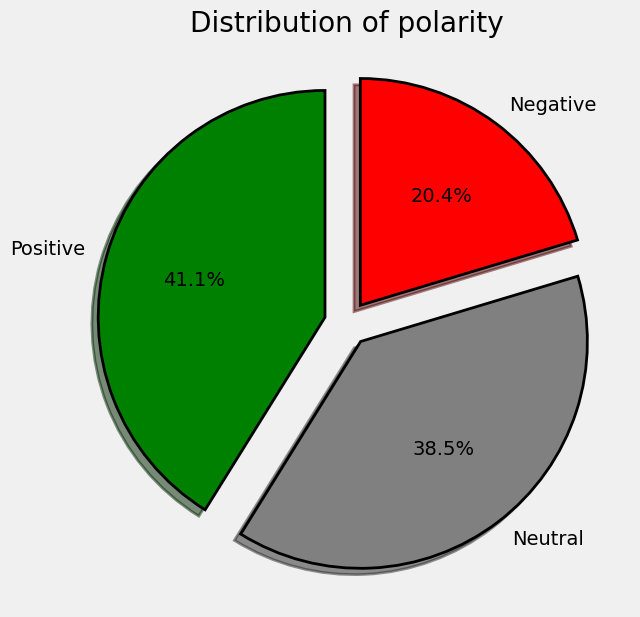

In [64]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('green',  'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df['Analysis_TB'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')

# FLAIR

In [68]:
# Define a function to get Flair sentiment prediction score

def score_flair(text):
    sentence = Sentence(text)
    classifier.predict(sentence)
    score = sentence.labels[0].score
    value = sentence.labels[0].value
    return score, value

In [69]:
# Get sentiment score for each review
df['scores_flair'] = df['tweet'].apply(lambda s: score_flair(s)[0])

# Predict sentiment label for each review
df['pred_flair'] = df['tweet'].apply(lambda s: score_flair(s)[1])

# Check the distribution of the score
#df['scores_flair'].describe()

In [70]:
# Check the distribution of the score
df['scores_flair'].describe()

count    328191.000000
mean          0.936004
std           0.112282
min           0.500028
25%           0.935896
50%           0.989686
75%           0.998610
max           0.999999
Name: scores_flair, dtype: float64

In [81]:
df['pred_flair'].value_counts()

pred_flair
NEGATIVE    236030
POSITIVE     92161
Name: count, dtype: int64

In [72]:
df.head(50)

,tweet,scores_V,compound,comp_vader,Subjectivity,Polarity,Analysis_TB,scores_flair,pred_flair
0,rt mattgertz elon musk interacting with sycophantic right wing influencers this weekend a thread,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,0.535714,0.285714,Positive,0.997678,POSITIVE
1,rt mattgertz elon musk interacting with sycophantic right wing influencers this weekend a thread,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,0.535714,0.285714,Positive,0.997678,POSITIVE
2,rt elizableu i d like to make something else clear i don t work for twitter elon musk any government political party group etc i ru,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.7783}",0.7783,Positive,0.241667,0.050000,Positive,0.993169,NEGATIVE
3,rt disclosetv just in elon musk has reinstated rep marjorie taylor greene s r ga personal twitter account,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,0.300000,0.000000,Neutral,0.956426,NEGATIVE
4,rt behizytweets breaking elon musk just reinstated marjorie taylor greene s account,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,0.000000,0.000000,Neutral,0.997801,NEGATIVE
5,rt w terrence elon musk should purchase the rights to the the view on abc i would love to see the look on their faces and watch them,"{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.6369}",0.6369,Positive,0.600000,0.500000,Positive,0.983947,POSITIVE
6,rt dashdobrofsky cnn s jake tapper asked hakeem jeffries what his reaction was to donald trump being reinstated on twitter by elon musk,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,0.000000,0.000000,Neutral,0.989564,NEGATIVE
7,rt jtanews elon musk bantered with kanye west and trolled the anti defamation league this weekend,"{'neg': 0.133, 'neu': 0.867, 'pos': 0.0, 'compound': -0.3182}",-0.3182,Negative,0.000000,0.000000,Neutral,0.972121,NEGATIVE
8,rt tradutordobr jair bolsonaro elon musk here they call me a myth i don t know why but you really are the myth of our freedom,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.7783}",0.7783,Positive,0.200000,0.200000,Positive,0.998886,POSITIVE
9,whothefisfran watching elon musk masterbate,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,Neutral,0.000000,0.000000,Neutral,0.978243,POSITIVE


Text(0.5, 1.0, 'Distribution of polarity')

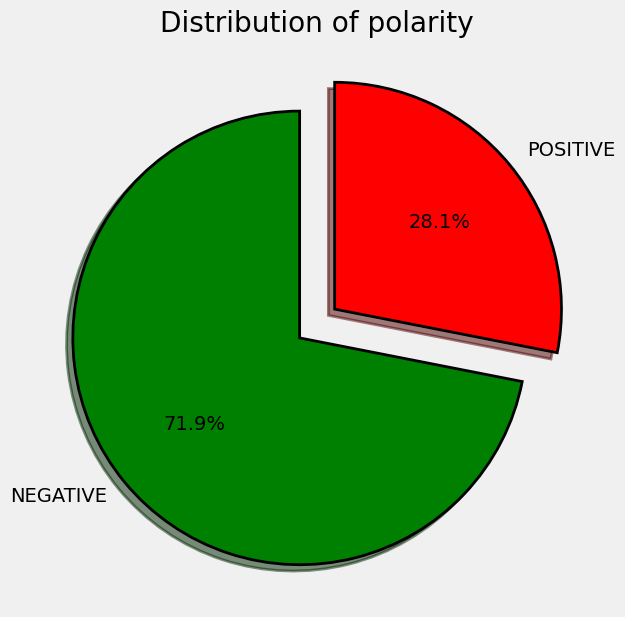

In [133]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('green', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df['pred_flair'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')

### Let's compare the Negative situation

In [73]:
# record 2
df.iloc[2]['tweet']

'rt elizableu i d like to make something else clear i don t work for twitter elon musk any government political party group etc i ru'

This expresion, it looks like hidden negative feeling. 
- Flair gets the meaning (Negative) whereas both Vader and TextBlob get Postive meaning. Both of them fail to guess the meaning.

In [74]:
# record 3
df.iloc[3]['tweet']

'rt disclosetv just in elon musk has reinstated rep marjorie taylor greene s r ga personal twitter account'

This expresion, it seems taylor was blocked from twitter and Musk has reinstated her account.
The feeling is positive but what about who blocked Taylor and the story behind that.
- Flair gets the meaning (Negative) whereas both Vader and TextBlob get Neutral meaning. Both of them guess the meaning better than Flair. But what about if Elon Musk who gave the order to block Taylor? 

In [78]:
# record 7
df.iloc[7]['tweet']

'rt jtanews elon musk bantered with kanye west and trolled the anti defamation league this weekend'

This expresion, it seems Negative
- Flair and Vader get the meaning (Negative) whereas TextBlob get Neutral meaning. TextBlob fails to guess the meaning.

In [79]:
# record 11
df.iloc[11]['tweet']

'rt rpsagainsttrump wow we lost nearly followers since elon musk restored trump s twitter account if you re staying on twitter to'

This expresion, it seems Negative against Elon Musk and Trumps
- Flair gets the meaning (Negative) whereas both Vader and TextBlob get Positive. Both of them fail to guess the meaning.

In [80]:
# record 12
df.iloc[12]['tweet']

'rt mcjesse i m jealous of elon musk s kids they re the only people who never have to hear from him'

This expresion, it seems Negative against Elon Musk.
- Vader gets the meaning (Negative) whereas both Flir gets Positive and TextBlob get Neutral. Both of them fail to guess the meaning.

In [82]:
# record 20
df.iloc[20]['tweet']

'justin arnold sahouraxo why are the media are talking about elon musk and kanye x more than epstein and weins'

This expresion, it seems Negative against Elon Musk. It is a kind of negative  Question d'exclamation!? 
- Flair gets the meaning (Negative) whereas both Vader gets Neutral and TextBlob get Positive. Both of them fail to guess the meaning.

In [83]:
# record 25
df.iloc[25]['tweet']

'rt kff betting on inaction in washington says kff executive vice president larry levitt is always the safer way to go'

This expresion, it seems Neutral
- TextBlob gets the meaning (Neutral) whereas both Flir gets Negative and Vader get Positive. Both of them fail to guess the meaning.

In [84]:
# record 28
df.iloc[28]['tweet']

'rt deadmanwalks i just blocked elon musk twitter is better without him can we get blockelonmusk trending'

This expresion, it seems Negative against Elon Musk. 
- Flair gets the meaning (Negative) whereas both Vader and TextBlob get Positive. Both of them fail to guess the meaning.

### Result
- Flair is more sentiment analysing emotion and opinion than Vader and TextBlod.


In [116]:
df.columns

Index(['tweet', 'scores_V', 'compound', 'comp_vader', 'Subjectivity',
       'Polarity', 'Analysis_TB', 'scores_flair', 'pred_flair'],
      dtype='object')

In [117]:
df_VTBF = df.drop(['tweet', 'scores_V', 'compound', 'Subjectivity', 'Polarity', 'scores_flair'], axis=1)
df_VTBF

,comp_vader,Analysis_TB,pred_flair
0,NEUTRAL,POSITIVE,POSITIVE
1,NEUTRAL,POSITIVE,POSITIVE
2,POSITIVE,POSITIVE,NEGATIVE
3,NEUTRAL,NEUTRAL,NEGATIVE
4,NEUTRAL,NEUTRAL,NEGATIVE
...,...,...,...
328390,POSITIVE,POSITIVE,NEGATIVE
328391,NEGATIVE,POSITIVE,POSITIVE
328392,NEGATIVE,NEUTRAL,NEGATIVE
328393,NEGATIVE,NEGATIVE,NEGATIVE


In [120]:
df_VTBF.head()

,comp_vader,Analysis_TB,pred_flair
0,NEUTRAL,POSITIVE,POSITIVE
1,NEUTRAL,POSITIVE,POSITIVE
2,POSITIVE,POSITIVE,NEGATIVE
3,NEUTRAL,NEUTRAL,NEGATIVE
4,NEUTRAL,NEUTRAL,NEGATIVE


In [131]:
ElonMusk_Sentiment = df.drop(['scores_V', 'compound', 'Subjectivity', 'Polarity', 'scores_flair', 'comp_vader', 'Analysis_TB'], axis=1)
ElonMusk_Sentiment

,tweet,pred_flair
0,rt mattgertz elon musk interacting with sycophantic right wing influencers this weekend a thread,POSITIVE
1,rt mattgertz elon musk interacting with sycophantic right wing influencers this weekend a thread,POSITIVE
2,rt elizableu i d like to make something else clear i don t work for twitter elon musk any government political party group etc i ru,NEGATIVE
3,rt disclosetv just in elon musk has reinstated rep marjorie taylor greene s r ga personal twitter account,NEGATIVE
4,rt behizytweets breaking elon musk just reinstated marjorie taylor greene s account,NEGATIVE
...,...,...
328390,now see i was led to believe that he is pro wef but this video claims he is against the agenda i certainly ho,NEGATIVE
328391,rt mattophobia elon musk is genuinely such an arrogant dumb cunt it s incredible,POSITIVE
328392,rt capitolhunters someone has to say it elon musk has lied for years about his credentials he does not have a bs in physics or any,NEGATIVE
328393,rt stephenking speaking of bad jokes elon musk says trump can get back on twitter,NEGATIVE


we need to map the ‘NEGATIVE’ value to 0 and the ‘POSITIVE’ value to 1 

In [134]:
# Change the label of flair prediction to 0 if negative and 1 if positive
mapping = {'NEGATIVE': 0, 'POSITIVE': 1}
ElonMusk_Sentiment['pred_flair'] = ElonMusk_Sentiment['pred_flair'].map(mapping)

In [135]:
ElonMusk_Sentiment

,tweet,pred_flair
0,rt mattgertz elon musk interacting with sycophantic right wing influencers this weekend a thread,1
1,rt mattgertz elon musk interacting with sycophantic right wing influencers this weekend a thread,1
2,rt elizableu i d like to make something else clear i don t work for twitter elon musk any government political party group etc i ru,0
3,rt disclosetv just in elon musk has reinstated rep marjorie taylor greene s r ga personal twitter account,0
4,rt behizytweets breaking elon musk just reinstated marjorie taylor greene s account,0
...,...,...
328390,now see i was led to believe that he is pro wef but this video claims he is against the agenda i certainly ho,0
328391,rt mattophobia elon musk is genuinely such an arrogant dumb cunt it s incredible,1
328392,rt capitolhunters someone has to say it elon musk has lied for years about his credentials he does not have a bs in physics or any,0
328393,rt stephenking speaking of bad jokes elon musk says trump can get back on twitter,0


In [136]:
ElonMusk_Sentiment = ElonMusk_Sentiment.rename(columns={'pred_flair':'Sentiment'})

In [137]:
ElonMusk_Sentiment

,tweet,Sentiment
0,rt mattgertz elon musk interacting with sycophantic right wing influencers this weekend a thread,1
1,rt mattgertz elon musk interacting with sycophantic right wing influencers this weekend a thread,1
2,rt elizableu i d like to make something else clear i don t work for twitter elon musk any government political party group etc i ru,0
3,rt disclosetv just in elon musk has reinstated rep marjorie taylor greene s r ga personal twitter account,0
4,rt behizytweets breaking elon musk just reinstated marjorie taylor greene s account,0
...,...,...
328390,now see i was led to believe that he is pro wef but this video claims he is against the agenda i certainly ho,0
328391,rt mattophobia elon musk is genuinely such an arrogant dumb cunt it s incredible,1
328392,rt capitolhunters someone has to say it elon musk has lied for years about his credentials he does not have a bs in physics or any,0
328393,rt stephenking speaking of bad jokes elon musk says trump can get back on twitter,0


In [140]:
ElonMusk_Sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328191 entries, 0 to 328394
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tweet      328191 non-null  object
 1   Sentiment  328191 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.5+ MB


### Creating a word cloud for the tweets

To understand which words have been used most in the tweets, we create a word cloud function for both positive and negative tweets.

In [149]:
#create a function for wordcloud

def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
    

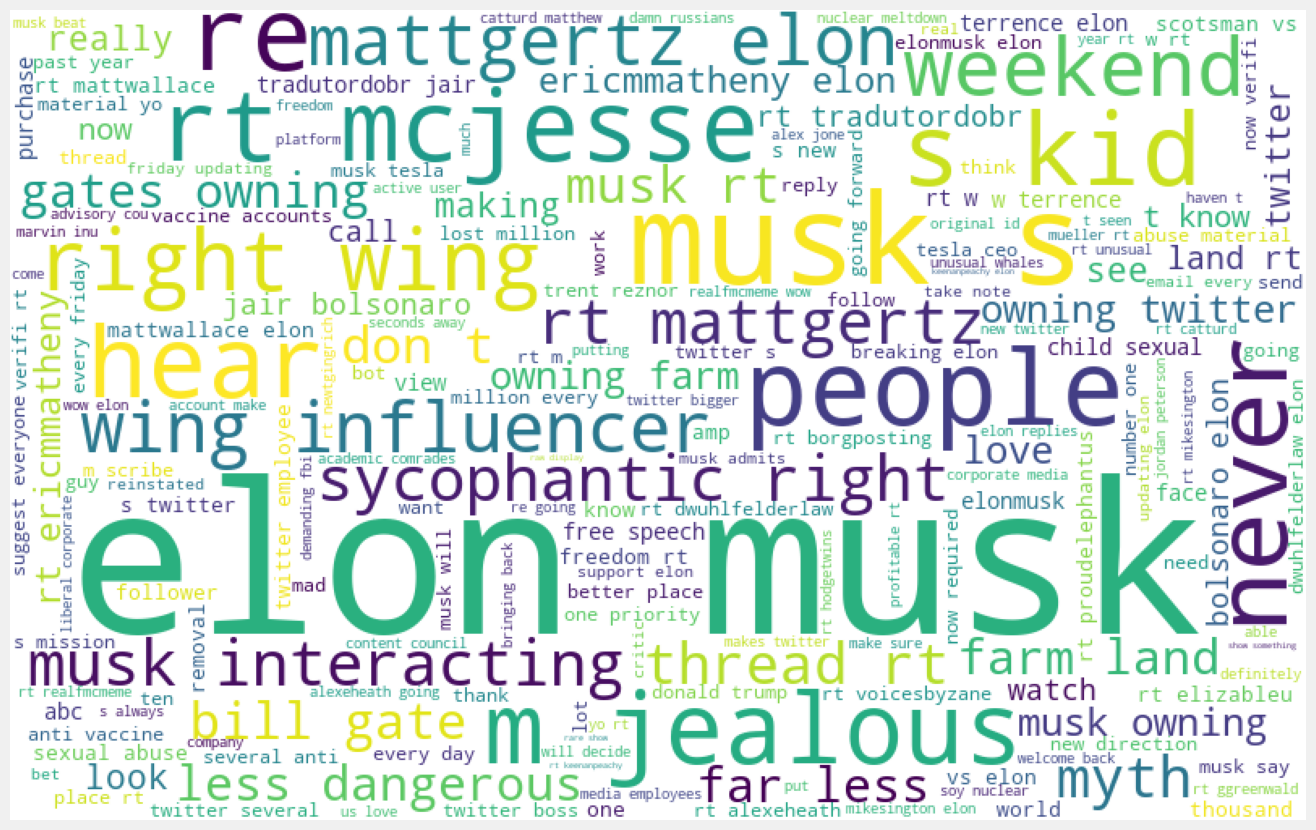

In [151]:
#wordcloud for positive tweets
posTweets = df.loc[df['pred_flair']=='POSITIVE', 'tweet']
create_wordcloud(posTweets)

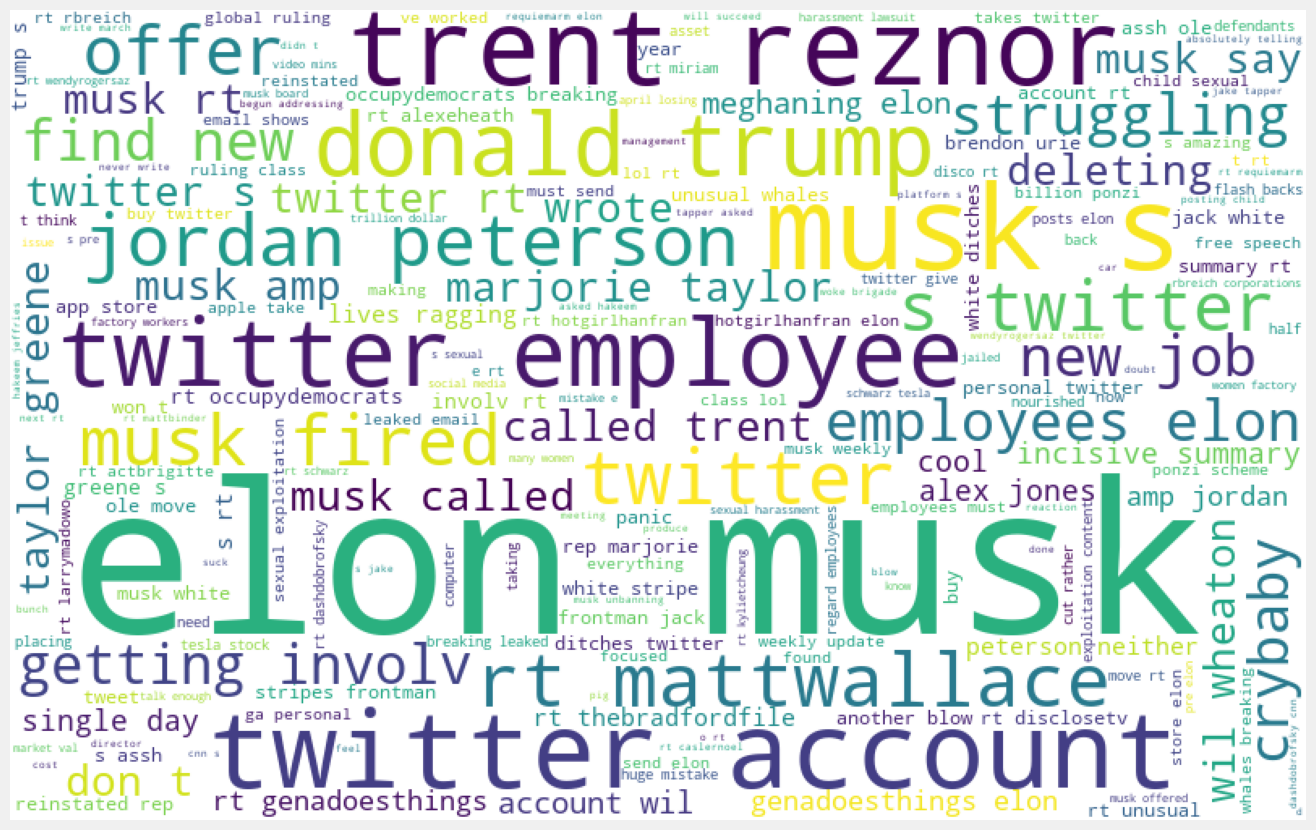

In [152]:
#wordcloud for negative tweets
negTweets = df.loc[df['pred_flair']=='NEGATIVE', 'tweet']
create_wordcloud(negTweets)

### Finding the most popular words in tweets and their frequency

Here, every tweet is broken down into words and analyzed

In [154]:
#break each tweet sentence into words

sentences = []

for word in df['tweet']:
    sentences.append(word)
    
sentences

lines = list()

for line in sentences:
    words = line.split()
    for w in words:
        lines.append(w)
        
lines[:20] #shows first 10 words in the first tweet

['rt',
 'mattgertz',
 'elon',
 'musk',
 'interacting',
 'with',
 'sycophantic',
 'right',
 'wing',
 'influencers',
 'this',
 'weekend',
 'a',
 'thread',
 'rt',
 'mattgertz',
 'elon',
 'musk',
 'interacting',
 'with']

Next, we remove stop words which are the common words used in the English Language such as ‘on’, ‘the’, ‘is’ etc. We then group the rest together to their root words eg joined, joining, and joint are grouped together as a single word — join and save it to a new data frame df.

In [163]:
#stemming all the words to their root word

stemmer = SnowballStemmer(language='english')

stem=[]

for word in lines:
    stem.append(stemmer.stem(word))
    
stem[:20]


#removes stopwords (very common words in a sentence)

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
        
        
#creates a new dataframe for the stem and shows the count of the most used words

df = pd.DataFrame(stem2)
df=df[0].value_counts()
df #shows the new dataframe


0
rt              255857
musk            254644
elon            252816
twitter         149136
s               101436
                 ...  
dannishay            1
jsondrich            1
fuckfac              1
seriouslydud         1
zenxv                1
Name: count, Length: 46225, dtype: int64

In [173]:
df.head(10)

0
rt          255857
musk        254644
elon        252816
twitter     149136
s           101436
trump        29328
t            29257
account      26116
employe      25925
elonmusk     20009
Name: count, dtype: int64

### Finally, we plot the most used words.

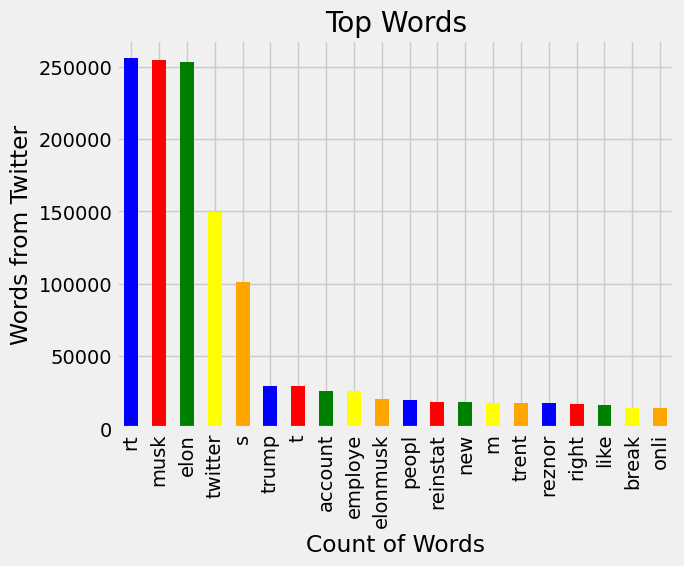

In [174]:
df.head(20).plot(kind='bar',title='Top Words', color = ['blue','red','green','yellow','orange'])
plt.xlabel('Count of Words')
plt.ylabel('Words from Twitter');

In [138]:
ElonMusk_Sentiment.to_csv('ElonMusk_Sentiment.csv', index=False)

In [139]:
pd.read_csv('ElonMusk_Sentiment.csv')

,tweet,Sentiment
0,rt mattgertz elon musk interacting with sycophantic right wing influencers this weekend a thread,1
1,rt mattgertz elon musk interacting with sycophantic right wing influencers this weekend a thread,1
2,rt elizableu i d like to make something else clear i don t work for twitter elon musk any government political party group etc i ru,0
3,rt disclosetv just in elon musk has reinstated rep marjorie taylor greene s r ga personal twitter account,0
4,rt behizytweets breaking elon musk just reinstated marjorie taylor greene s account,0
...,...,...
328186,now see i was led to believe that he is pro wef but this video claims he is against the agenda i certainly ho,0
328187,rt mattophobia elon musk is genuinely such an arrogant dumb cunt it s incredible,1
328188,rt capitolhunters someone has to say it elon musk has lied for years about his credentials he does not have a bs in physics or any,0
328189,rt stephenking speaking of bad jokes elon musk says trump can get back on twitter,0
